In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../data"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


all_stocks_5yr.csv
getSandP.py
individual_stocks_5yr.zip
merge.sh
nba.csv
sandp500.zip



In [3]:
data = pd.read_csv('../data/all_stocks_5yr.csv')
cl = data[data['Name']=='MMM'].close

In [5]:
scl = MinMaxScaler()
#Scale the data
cl = np.array(cl)
cl = cl.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)
cl

array([[0.00580061],
       [0.00554564],
       [0.01090005],
       ...,
       [0.82668281],
       [0.84064253],
       [0.83783784]])

In [6]:
#Create a function to process the data into 7 day look back slices
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,7)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1000
251
1000
251


In [7]:
#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)

Train on 1000 samples, validate on 251 samples
Epoch 1/300
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0031 - val_loss: 0.0050
Epoch 2/300
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0083 - val_loss: 0.0026
Epoch 3/300
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0026 - val_loss: 6.5593e-04
Epoch 4/300
1000/1000 [==============================] - 1s 1ms/step - loss: 5.3695e-04 - val_loss: 0.0015
Epoch 5/300
1000/1000 [==============================] - 1s 1ms/step - loss: 4.0206e-04 - val_loss: 7.2842e-04
Epoch 6/300
1000/1000 [==============================] - 1s 1ms/step - loss: 5.7106e-04 - val_loss: 6.9046e-04
Epoch 7/300
1000/1000 [==============================] - 1s 1ms/step - loss: 4.7606e-04 - val_loss: 9.9078e-04
Epoch 8/300
1000/1000 [==============================] - 1s 1ms/step - loss: 5.8368e-04 - val_loss: 0.0011
Epoch 9/300
1000/1000 [==============================] - 1s 1ms/step - loss: 7.3378e-04 - v

1000/1000 [==============================] - 1s 1ms/step - loss: 2.3097e-04 - val_loss: 0.0018
Epoch 77/300
1000/1000 [==============================] - 1s 1ms/step - loss: 2.2910e-04 - val_loss: 0.0018
Epoch 78/300
1000/1000 [==============================] - 1s 1ms/step - loss: 2.2795e-04 - val_loss: 0.0018
Epoch 79/300
1000/1000 [==============================] - 1s 1ms/step - loss: 2.2598e-04 - val_loss: 0.0017
Epoch 80/300
1000/1000 [==============================] - 1s 1ms/step - loss: 2.2480e-04 - val_loss: 0.0017
Epoch 81/300
1000/1000 [==============================] - 1s 1ms/step - loss: 2.2275e-04 - val_loss: 0.0017
Epoch 82/300
1000/1000 [==============================] - 1s 1ms/step - loss: 2.2153e-04 - val_loss: 0.0017
Epoch 83/300
1000/1000 [==============================] - 1s 1ms/step - loss: 2.1943e-04 - val_loss: 0.0017
Epoch 84/300
1000/1000 [==============================] - 1s 1ms/step - loss: 2.1818e-04 - val_loss: 0.0017
Epoch 85/300
1000/1000 [=================

1000/1000 [==============================] - 1s 1ms/step - loss: 1.5670e-04 - val_loss: 0.0011
Epoch 152/300
1000/1000 [==============================] - 1s 1ms/step - loss: 1.2401e-04 - val_loss: 9.4449e-04
Epoch 153/300
1000/1000 [==============================] - 1s 1ms/step - loss: 1.3608e-04 - val_loss: 9.3064e-04
Epoch 154/300
1000/1000 [==============================] - 1s 1ms/step - loss: 1.1858e-04 - val_loss: 8.2962e-04
Epoch 155/300
1000/1000 [==============================] - 1s 1ms/step - loss: 1.2430e-04 - val_loss: 8.1868e-04
Epoch 156/300
1000/1000 [==============================] - 1s 1ms/step - loss: 1.1466e-04 - val_loss: 7.7136e-04
Epoch 157/300
1000/1000 [==============================] - 1s 1ms/step - loss: 1.1796e-04 - val_loss: 7.6921e-04
Epoch 158/300
1000/1000 [==============================] - 1s 1ms/step - loss: 1.1316e-04 - val_loss: 7.4736e-04
Epoch 159/300
1000/1000 [==============================] - 1s 1ms/step - loss: 1.1547e-04 - val_loss: 7.4789e-04
E

1000/1000 [==============================] - 1s 834us/step - loss: 1.3399e-04 - val_loss: 8.0377e-04
Epoch 224/300
1000/1000 [==============================] - 1s 808us/step - loss: 1.3385e-04 - val_loss: 8.0230e-04
Epoch 225/300
1000/1000 [==============================] - 1s 857us/step - loss: 1.3372e-04 - val_loss: 8.0096e-04
Epoch 226/300
1000/1000 [==============================] - 1s 866us/step - loss: 1.3361e-04 - val_loss: 7.9994e-04
Epoch 227/300
1000/1000 [==============================] - 1s 778us/step - loss: 1.3354e-04 - val_loss: 7.9975e-04
Epoch 228/300
1000/1000 [==============================] - 1s 791us/step - loss: 1.3359e-04 - val_loss: 8.0190e-04
Epoch 229/300
1000/1000 [==============================] - 1s 806us/step - loss: 1.3395e-04 - val_loss: 8.0948e-04
Epoch 230/300
1000/1000 [==============================] - 1s 796us/step - loss: 1.3499e-04 - val_loss: 8.2251e-04
Epoch 231/300
1000/1000 [==============================] - 1s 799us/step - loss: 1.3657e-04 - 

Epoch 296/300
1000/1000 [==============================] - 1s 1ms/step - loss: 1.2303e-04 - val_loss: 7.5738e-04
Epoch 297/300
1000/1000 [==============================] - 1s 1ms/step - loss: 1.2310e-04 - val_loss: 7.5704e-04
Epoch 298/300
1000/1000 [==============================] - 1s 1ms/step - loss: 1.2291e-04 - val_loss: 7.5751e-04
Epoch 299/300
1000/1000 [==============================] - 1s 1ms/step - loss: 1.2294e-04 - val_loss: 7.5708e-04
Epoch 300/300
1000/1000 [==============================] - 1s 1ms/step - loss: 1.2276e-04 - val_loss: 7.5731e-04


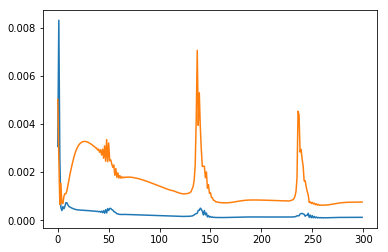

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [9]:
X_test[0]

array([[0.46959459],
       [0.46577002],
       [0.46800102],
       [0.46169046],
       [0.46717236],
       [0.46755482],
       [0.47176186]])

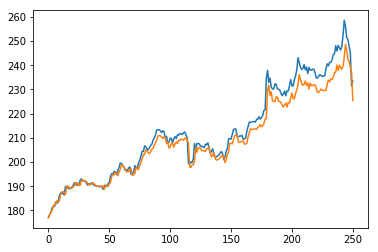

In [10]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [11]:
act = []
pred = []
#for i in range(250):
i=249
Xt = model.predict(X_test[i].reshape(1,7,1))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt))
act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[237.19437]], actual:[[231.44]]


In [12]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

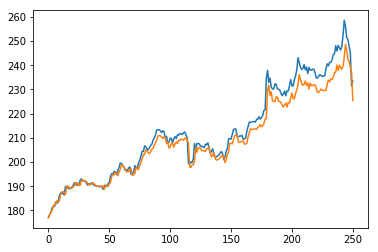

In [13]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [14]:
X_test[249]

array([[0.96003315],
       [1.        ],
       [0.98329934],
       [0.95480622],
       [0.94817695],
       [0.93185875],
       [0.91420194]])

In [15]:
X_test[248]

array([[0.93026517],
       [0.96003315],
       [1.        ],
       [0.98329934],
       [0.95480622],
       [0.94817695],
       [0.93185875]])